In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori

In [2]:
# As the file is in transaction data we will be reading data directly
with open('C:\Data Science\Assignments\AssociationRules/groceries.csv') as f:
    groceries=f.read()

In [3]:
# splitting the data into separate transactions using separator as "\n"
groceries=groceries.split('\n')    
groceries_list=[]

In [4]:
for i in groceries:
    groceries_list.append(i.split(','))
    
all_groceries_list=[i for item in groceries_list for i in item]

In [5]:
from collections import Counter
item_frequencies=Counter(all_groceries_list)
# after sorting
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])

In [6]:
# Storing frequencies and items in separate variables
frequencies=list(reversed([i[1] for i in item_frequencies]))
items=list(reversed([i[0]for i in item_frequencies]))

Text(0, 0.5, 'Count')

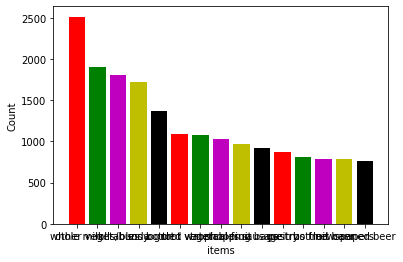

In [7]:
# barplot of top 10 
plt.bar(height = frequencies[0:15],x = list(range(0,15)),color='rgmyk');
plt.xticks(list(range(0,15),),items[0:15]);
plt.xlabel("items");
plt.ylabel('Count')

In [8]:
#Creating Data Frame for the transactions data
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate
groceries_series=pd.DataFrame(pd.Series(groceries_list))
groceries_series.tail(20)
groceries_series = groceries_series.iloc[:9835  ,:] # Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate
groceries_series.columns=['values']

In [9]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X=groceries_series['values'].str.join(sep='*').str.get_dummies(sep='*')

In [23]:
#apriori function
frequent_itemsets=apriori(X,min_support=0.01,use_colnames=True)
frequent_itemsets.head(20)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [12]:
#association rule
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules.head()
rules.sort_values('lift',ascending =False, inplace =True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
43,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
41,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
46,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
53,"(yogurt, whipped/sour cream)",(other vegetables),0.020742,0.193493,0.010168,0.490196,2.533410,0.006154,1.581995
44,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
15,(onions),(other vegetables),0.031012,0.193493,0.014235,0.459016,2.372268,0.008234,1.490817
39,"(whole milk, pork)",(other vegetables),0.022166,0.193493,0.010168,0.458716,2.370714,0.005879,1.489988
51,"(whole milk, whipped/sour cream)",(other vegetables),0.032232,0.193493,0.014642,0.454259,2.347679,0.008405,1.477820
37,"(whole milk, pip fruit)",(other vegetables),0.030097,0.193493,0.013523,0.449324,2.322178,0.007700,1.464578


Text(0, 0.5, 'count')

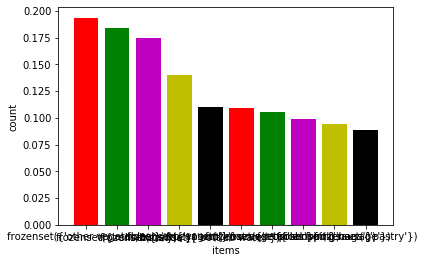

In [21]:
frequent_itemsets.sort_values('support',ascending =False,inplace =True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11]);plt.xlabel('items');
plt.ylabel('count')

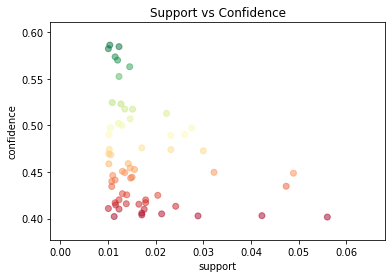

In [13]:
#Visualize Results
#Support vs Confidence
colors = (0,0,0)
plt.scatter(rules['support'], rules['confidence'], c=rules['confidence'], cmap="RdYlGn", alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

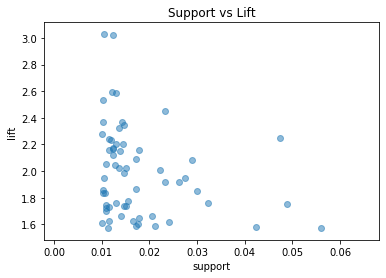

In [14]:
#Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

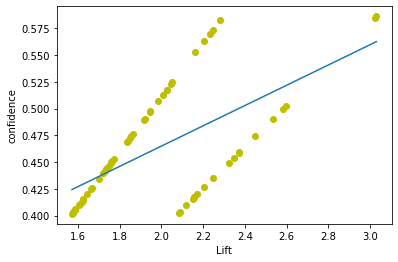

In [15]:
#Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.xlabel('Lift')
plt.ylabel('confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

In [16]:
#Filtering the results
rules[ (rules['lift'] >= 2) &
      (rules['confidence'] >= 0.5) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
43,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
41,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
46,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
32,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
27,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
58,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
59,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
34,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
61,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719


In [19]:
#Filtering the results
rules[ (rules['lift'] >= 2.2) &
      (rules['confidence'] >= 0.55) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
43,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
32,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
27,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
58,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
59,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
